In [113]:
import matplotlib.pyplot as plt

In [114]:
from scipy.integrate import solve_ivp
import numpy as np
gamma=0.7
g=9.8
m=np.array([4,8,12,16])

def F(t,v_y,m):
    return (-1/4)*g+ (1/(2*m))*gamma*v_y**2

ts = np.linspace(0,15)
dt = ts[1]-ts[0]
vs = np.zeros( (len(ts),4) ) 
vs[0] = [0,0,0,0]
    
for i in range(1,len(vs)):
    vs[i] = vs[i-1] + dt * F(ts[i-1],vs[i-1],m)

Text(0, 0.5, 'Velocidad')

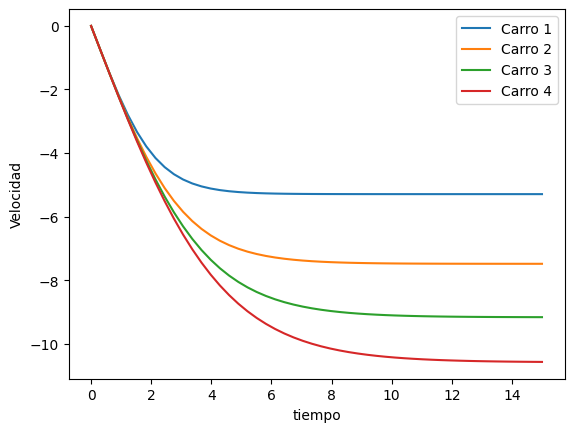

In [115]:
plt.plot(ts,vs[:,0],label="Carro 1")
plt.plot(ts,vs[:,1],label="Carro 2")
plt.plot(ts,vs[:,2],label="Carro 3")
plt.plot(ts,vs[:,3],label="Carro 4")
plt.legend()
plt.xlabel("tiempo")
plt.ylabel("Velocidad")

In [116]:
a= 0.38709893
miu=39.4234021
e= 0.20563069
t= np.linspace(0,10, 10000)
alpha=1.09778201E-8

condiciones=[a*(1+e), 0, 0, np.sqrt((miu*(1-e))/(a*(1+e)))]

def f(t,cond0):
    x0,y0,vx0,vy0= cond0
    Vx=vx0
    Vy=vy0
    norm=np.sqrt(x0**2+y0**2)
    ax=-1* (miu/norm**2)*(1+(alpha)/(norm**2))*x0
    ay=-1* (miu/norm**2)*(1+((alpha)/norm**2))*y0

    return [Vx,Vy,ax,ay]


solucion=solve_ivp(f,[0,10],y0=condiciones,t_eval=t)




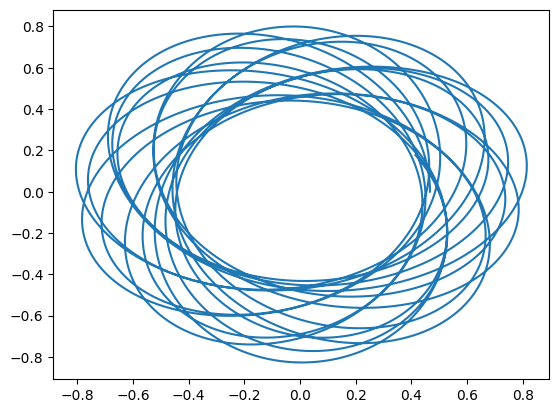

In [117]:
x,y,Vx,Vy= solucion.y

plt.plot(x,y)

In [118]:
thetaR=np.atan2(x,y)
angulos=[]
temp=[]
for i in range(len(thetaR)):
    p=x[i]*Vx[i]+ y[i]*Vy[i]
    
    if np.isclose(p, 0, atol=0.01):  
        angulos.append(thetaR[i])
        
        temp.append(t[i])




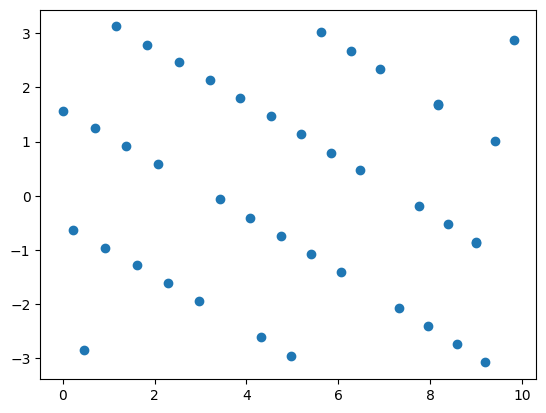

In [119]:
plt.scatter(temp,angulos)

In [120]:



x = np.linspace(0, 6, 60)
f0_sim = 1  
fp0_sim = 0  


def schrodinger(x, y, E):
    f0_sim = y[0]  
    fp0_sim = y[1]  
    df0dx = fp0_sim
    dfpdx = (x**2 - E) * f0_sim
    return [df0dx, dfpdx]


def verificar_no_divergencia(f_final, fp_final, epsilon=1e-2):  
    return np.sqrt(f_final*2 + fp_final*2) < epsilon


energias = []
for E in np.linspace(0.1,100, 200):  
    y0 = [f0_sim, fp0_sim]  
    sol = solve_ivp(schrodinger, [x[0], x[-1]], y0, args=(E,), t_eval=x)
    
    
    f_final = sol.y[0, -1]  
    fp_final = sol.y[1, -1]  
    
    
    if verificar_no_divergencia(f_final, fp_final):
        energias.append(E)

#
print("Energías que no divergen:", energias)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24004\1683246785.py:15: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(f_final*2 + fp_final*2) < epsilon


Energías que no divergen: []
